#### Introduction of both problems:

1. Monty Hall problem 

"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?" Parade magazine in 1990

2. Monty Fall variant

"The host does not know what lies behind the doors, and opens one at random that happens not to reveal the car"


Source: https://en.wikipedia.org/wiki/Monty_Hall_problem

#### 1. Monty Hall problem in theory

At the beginning, giving initial settings for this problem we have 1/3 chance of selecting a Car.

$$ P(C_{1}) = 1/3, P(C_{2}) = 1/3, P(C_{3}) = 1/3 $$ 
where $C_{i}$  - event that the Car is in $ i $

Lets say the contestant chooses the 1st door, now what is the probability that the host will open Door 3, given that the prize is behind either door 1,2 or 3.

$$ P(O_{3}|C_{1}) = 1/2, P(O_{3}|C_{2}) = 1 , P(O_{3}|C_{3}) = 0 $$
where $O_{i}$  - event that the host opens door $ i $

Now that we have understood the reasoning, lets check the optimal strategy. Suppose that in this example the host opens door 3. Door 3 doesn’t have the prize, now how sure can we be that door 2 has the prize?

To calculate conditional probabilities Bayesian Rule is used. Bayesian Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

$$ P(A_{i}|B) = \frac{P(B|A_{i})P(A_{i})}{P(B) }  = \frac{P(B|A_{i})P(A_{i})}{\sum \limits _{j} P(B|A_{j})P(A_{j}) } $$

P(A|B) — is the probability of A given that B has already happened.
P(B|A) — is the probability of B given that A has already happened. It looks circular and arbitrary now but we will see why it works shortly.
P(A) — is the unconditional probability of A occurring.
P(B) — is the unconditional probability of B occurring.


$$ P(C_{2}|O_{3}) = \frac{P(O_{3}|C_{2})P(C_{2})}{P(O_{3}|C_{1})P(C_{1}) + P(O_{3}|C_{2})P(C_{2}) + P(O_{3}|C_{3})P(C_{3}) } =   \frac{(1)(\frac{1}{3})}{(\frac{1}{2})(\frac{1}{3}) + (1)(\frac{1}{3}) + (0)(\frac{1}{3}) } = \frac{2}{3} $$

If we had remainded with door 1 in this scenario:

$$ P(C_{1}|O_{3}) = \frac{P(O_{3}|C_{1})P(C_{1})}{P(O_{3}|C_{1})P(C_{1}) + P(O_{3}|C_{2})P(C_{2}) + P(O_{3}|C_{3})P(C_{3}) } =   \frac{(\frac{1}{2})(\frac{1}{3})}{(\frac{1}{2})(\frac{1}{3}) + (1)(\frac{1}{3}) + (0)(\frac{1}{3}) } = \frac{1}{3} $$

#### 2. Monty Hall problem - simulation of the optimal strategy

Total time for Loop   47.76332402229309


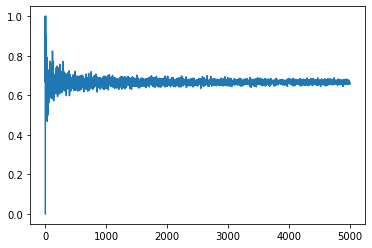

In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from time import time
from random import choice as ch

ac = []
tc = []
N = []
st = time()

for game_iter in range(1,5000):
    st1 = time()
    score = []
    runs = 0
    cards = [1,2,3]
    for K in range(1,game_iter): # sub loop that simulates 1 to game_iter games
        
        ##initial settings
        not_to_open_doors = []
        host_doors = cards.copy()
        player_doors = cards.copy()
        
        #Randomly choose as answer which host knows
        winning_door = ch(host) 
        not_to_open_doors.append(winning_door) # Host knows not to open this door
        #Randomly choose contestant pick
        players_choice = ch(player_doors) # Contestants random guess
        not_to_open_doors.append(players_choice)
        
        door_to_eliminate = []
        for i in host: # The computation....host will eliminate one door
            if i not in not_to_open_doors:
                door_to_eliminate.append(i)
            
        #if 2 possibilities, pick one at random
        host_elimination = ch(door_to_eliminate)
        #print ("The elimination",chance)
        #print (player)
        player_doors.pop(player_doors.index(host_elimination))            
        player_doors.pop(player_doors.index(players_choice))
        #print ("final answe",player)
        if player_doors[0] == winning_door:
            score.append(1)
        else:
            score.append(0)
        runs = K
        
    ac.append(np.mean(score))
    N.append(game_iter)
    en1 = time()
    tc.append(en1-st1)
en = time()
print ("Total time for Loop  ", en - st )

plt.plot(N,ac)
plt.show()

#plt.plot(N,tc)
#plt.show()


#### 1. Monty Fall problem in theory

#### 2. Monty Fall problem - simulation of the different strategies